# ***Case Study: Expanding our candy brand***

**Scerio**

**Lidl purchasing group wants to expand our candy offering. These are store brand candies that we
sell along the brand offerings. The idea is to create a brand new product. The team is discussing
various options at the moment.
Some prefer cookie-based sweets while others think that it should be gummies. The Divisional
Director responsible for purchasing has decided to use a more data-driven approach. He contracted
with a market research group to collect data on products in the market and their characteristics and
customer sentiment.
The market research data is now available and it is your job to find out which product characteristics
drive customer sentiment and subsequently make a recommendation on a new product.**

# Candy Power Ranking
This folder contains the data behind the story The Ultimate Halloween Candy Power Ranking.

candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no.

The data contains the following fields:



| Feature   	| Description                    	|   	
|-----------	|--------------------------------	|
| chocolate 	| Does it contain chocolate?     	|
| fruity    	| Is it fruit flavored?          	|
| caramel   	| Is there caramel in the candy? 	|
|peanutalmondy:|Does it contain peanuts, peanut butter or almonds?|
|nougat| Does it contain nougat?|
|crispedricewafer| Does it contain crisped rice, wafers, or a cookie component?|
|hard| Is it a hard candy?|
|bar| Is it a candy bar?|
|pluribus| Is it one of many candies in a bag or box?|
|sugarpercent| The percentile of sugar it falls under within the data set.|
|pricepercent| The unit price percentile compared to the rest of the set.|
|winpercent| The overall win percentage according to 269,000 matchups.|


## Possible analysis to compe up with new candy idea

- Calculate win percent?
- which feature has most impact on win percent?

In [712]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import pandas as pd
from pandas_summary import DataFrameSummary
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#  Read the data 

In [713]:
data = pd.read_csv('./candy_data.csv')


# Visualise some rows

In [714]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


# Data set description

In [715]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
competitorname,85,85,Sugar Daddy,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chocolate,85,NaN,NaN,NaN,0.435294,0.498738,0,0,0,1,1
fruity,85,NaN,NaN,NaN,0.447059,0.50014,0,0,0,1,1
caramel,85,NaN,NaN,NaN,0.164706,0.373116,0,0,0,0,1
peanutyalmondy,85,NaN,NaN,NaN,0.164706,0.373116,0,0,0,0,1
nougat,85,NaN,NaN,NaN,0.0823529,0.276533,0,0,0,0,1
crispedricewafer,85,NaN,NaN,NaN,0.0823529,0.276533,0,0,0,0,1
hard,85,NaN,NaN,NaN,0.176471,0.383482,0,0,0,0,1
bar,85,NaN,NaN,NaN,0.247059,0.433861,0,0,0,0,1
pluribus,85,NaN,NaN,NaN,0.517647,0.502654,0,0,1,1,1


In [716]:
data.sugarpercent = round(data.sugarpercent,3)
data.pricepercent = round(data.pricepercent,3)
data.winpercent = round(data.winpercent,3)

In [717]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [723]:
data.isnull().sum()/len(data)

competitorname      0.0
chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

** There are no nan values in the data set which has 85 rows in total **

# Let's see the correlation matrix to have some visualization over importance of each features with each other

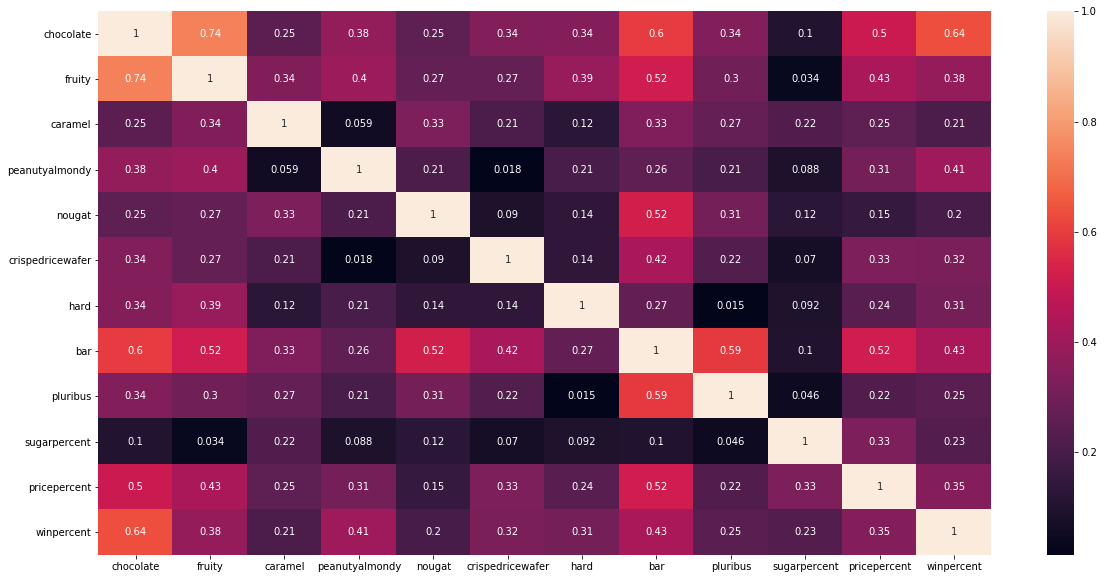

In [718]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True)

# Plot a descending list of correlation pair (Max on top)

In [721]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

    Feature1    Feature2      corr            Components
0  chocolate      fruity  0.741721      chocolate-fruity
1  chocolate  winpercent  0.636517  chocolate-winpercent
2  chocolate         bar  0.597421         chocolate-bar
3        bar    pluribus  0.593409          bar-pluribus
4     nougat         bar  0.522976            nougat-bar


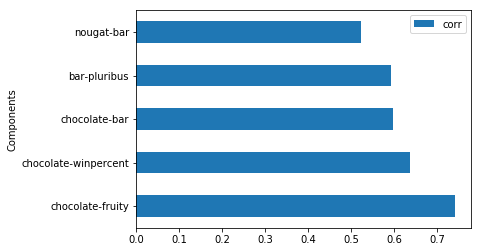

In [770]:
data1 = corrank(data).head(5)
labels = pd.DataFrame(data1["Feature1"]+"-"+data1["Feature2"])
data1["Components"] = labels
print(data1.head(5))
data1.plot(x='Components',kind='barh')


*** We can see Chocolate and Fruity has highest correlation which can reflect highest win percentage by using these two feautres ***

*** Take the data points which has winpercentage quantile of .6 ***

In [751]:
winners = data[data.winpercent>data.winpercent.quantile(.6)]


In [752]:
winners.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.915
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.120
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375


# Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. 
***The apriori algorithm has been designed to operate on databases containing user buying information. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.3 (30%), a frequent itemset is defined as a set of items that occur together in at least 30% of all transactions in the database.***

In [772]:
from mlxtend.frequent_patterns import apriori
df =  winners[data.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


print(association)

    support                     itemsets
1  0.323529             (peanutyalmondy)
4  0.323529  (peanutyalmondy, chocolate)
3  0.441176                   (pluribus)
2  0.470588                        (bar)
5  0.470588             (bar, chocolate)
0  0.794118                  (chocolate)


# Lets Visualize the most frequent item sets

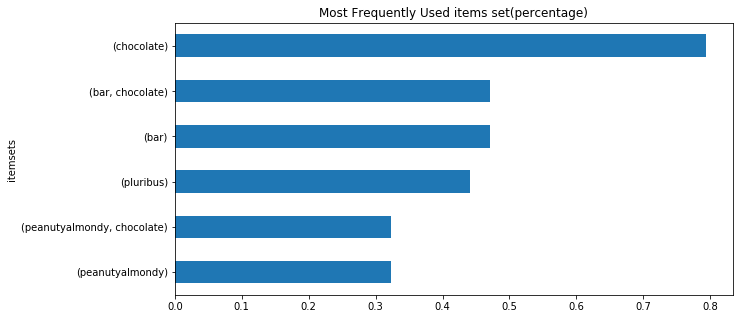

In [774]:
association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used items set(percentage)',sort_columns=True,figsize = (10,5),legend=False)

*** We can clearly see that Chocolate has been used 80% time where win percent quantile is .6 , also bar and chocolate has best combiantion *** 

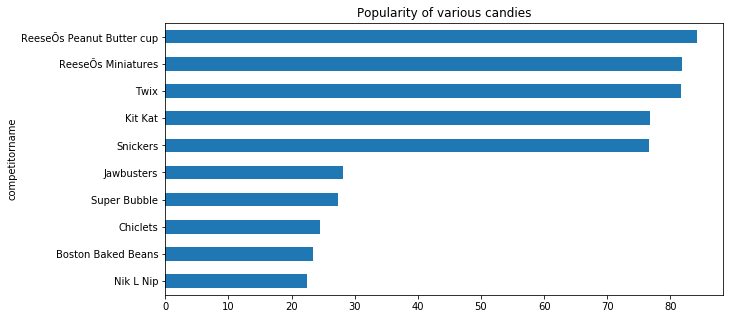

In [41]:
popularity = data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

# Chocolate 

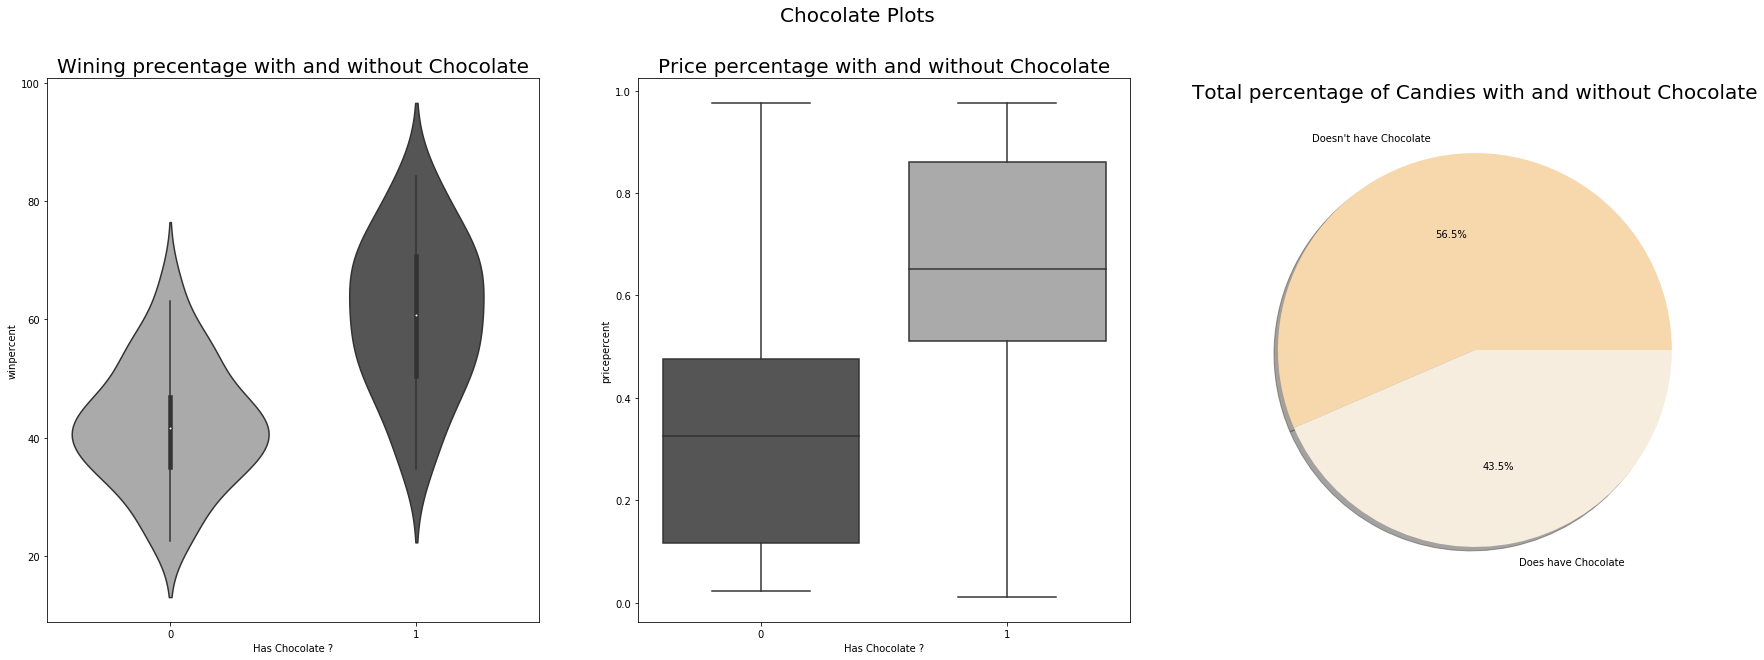

In [780]:
plt.figure(figsize=(30,10))

plt.suptitle("Chocolate Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Chocolate",fontsize=20)
sns.violinplot(data=data,x="chocolate",y="winpercent",color="brown",palette="gray_r")
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Chocolate",fontsize=20)
plt.pie(data.chocolate.value_counts(), autopct='%1.1f%%',colors=["#F7D8AD","#F7EDDF"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Chocolate",fontsize=20)
sns.boxplot(y="pricepercent", x="chocolate", data=data, palette="gray")
plt.xlabel("Has Chocolate ?")

plt.show()


# Plot description:

- *** The plot reflects how the chocolate is making great impact on win percentage as we can see it reaches 80% win percentages, more than any other features. ***
- *** The second plot shows hwo the chocolate also impacting price percentage , the chocolate is expensive. So, if we use chocolate the product price will be higher. ***

- *** Almost half of all candies has chocolate, again it clearly shows why the more than half of the product has chocolate as an ingredients ***

# Caramel

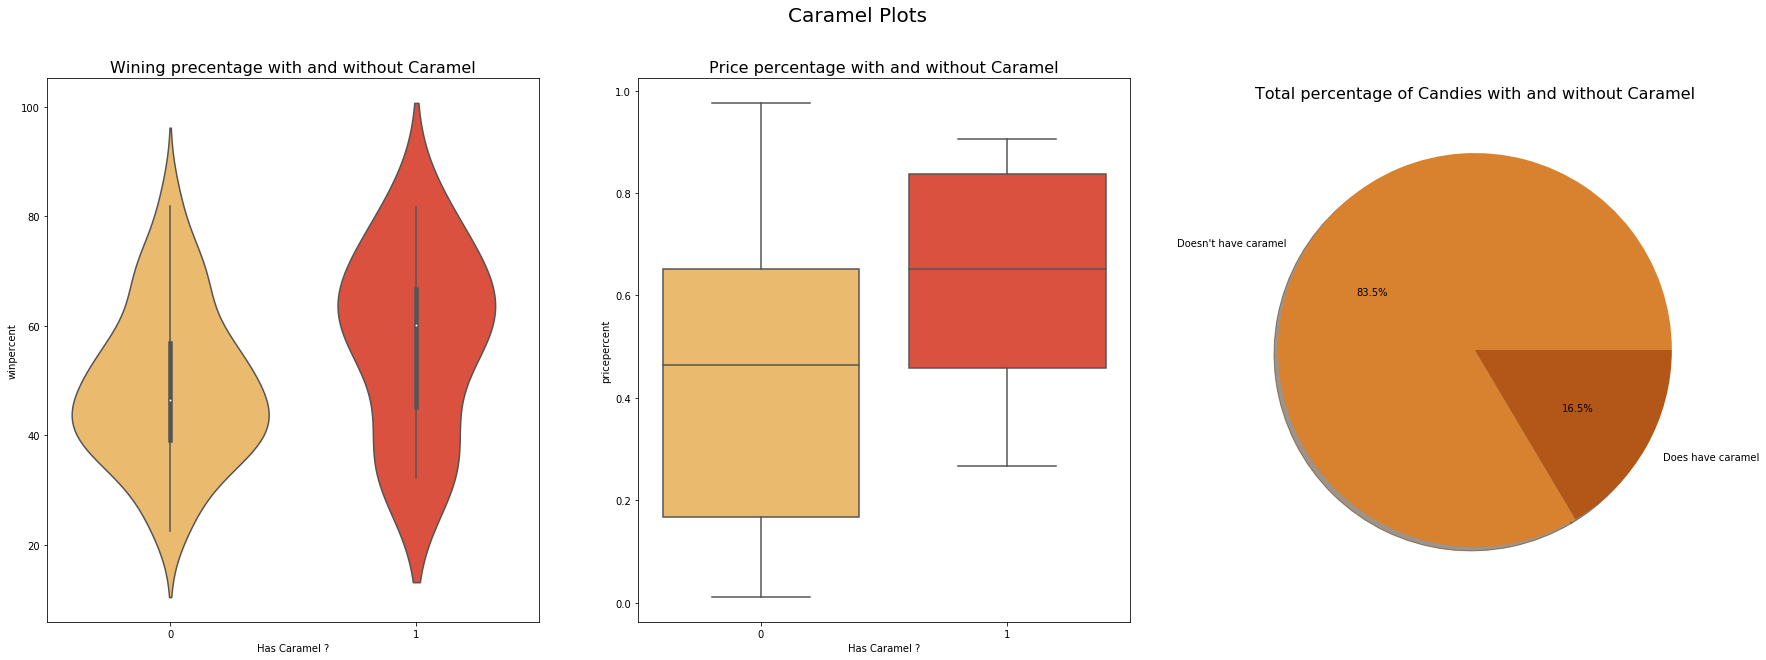

In [62]:
plt.figure(figsize=(30,10))

plt.suptitle("Caramel Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Caramel",fontsize=16)
sns.violinplot(data=data,x="caramel",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Caramel",fontsize=16)
plt.pie(data.caramel.value_counts(), autopct='%1.1f%%',colors=["#D8822F","#B35719"],labels=["Doesn't have caramel","Does have caramel"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Caramel",fontsize=16)
sns.boxplot(y="pricepercent", x="caramel", data=data, palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.show()

# Plot description:

- *** The fist plot shows the caramel has very low impact on win percentage as with or without caramel , the win percentage is quite high. Though if we see inter quantile range and probability distribution of the data , it reflects slight impact though.  ***
- *** It's not super costly but since it is generally used with multiple ingredients it has higher price (look at the heatmap) ***
- *** it's not very common to use caramel (only 16.5% uses it) ***

# Fruit


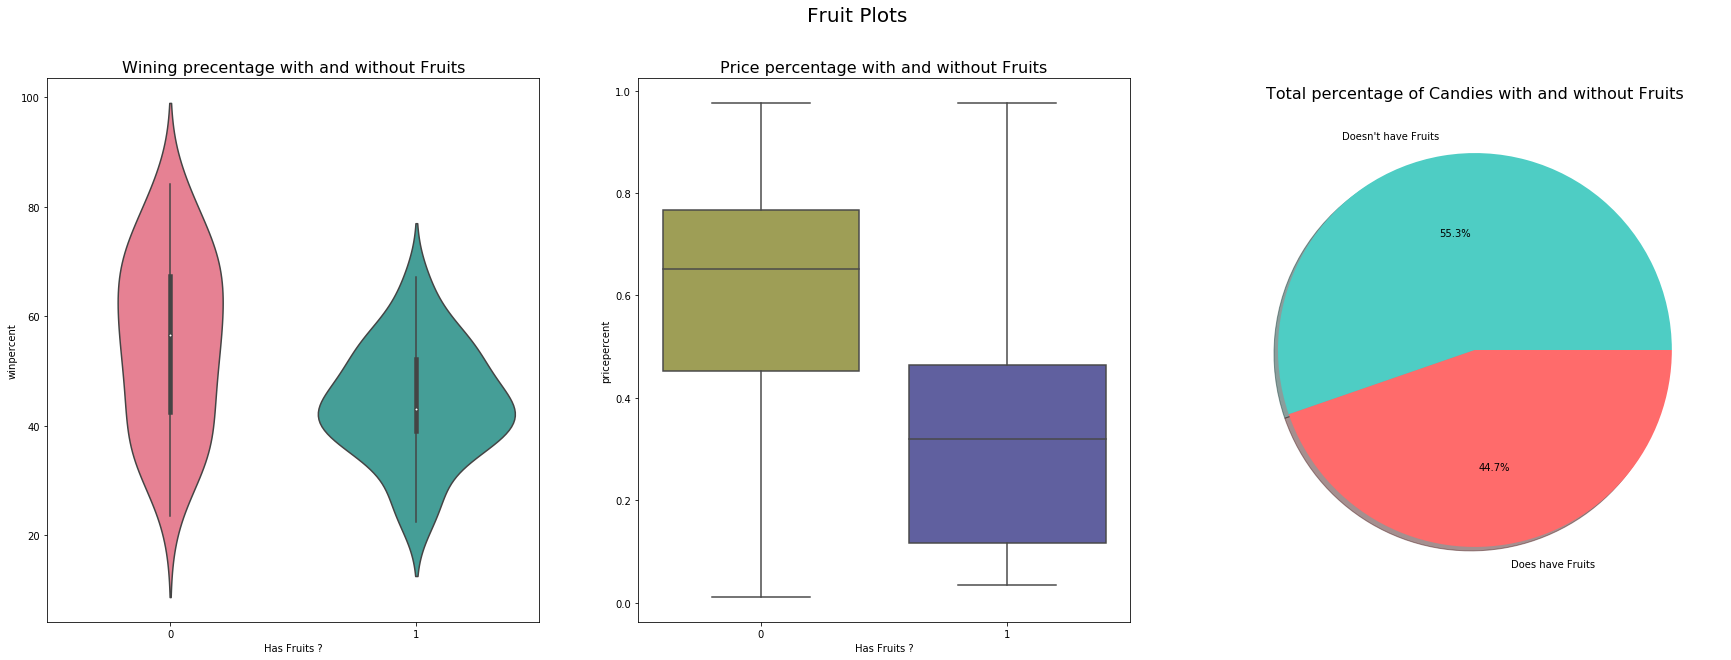

In [63]:
plt.figure(figsize=(30,10))

plt.suptitle("Fruit Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Fruits",fontsize=16)
sns.violinplot(data=data,x="fruity",y="winpercent",color="brown",palette="husl")
plt.xlabel("Has Fruits ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Fruits",fontsize=16)
plt.pie(data.fruity.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Fruits","Does have Fruits"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Fruits",fontsize=16)
sns.boxplot(y="pricepercent", x="fruity", data=data, palette="gist_stern_r")
plt.xlabel("Has Fruits ?")

plt.show()

# Plot Descriptions:

- *** Fruits are not good for winning. Best score from fruity candy is close to 80, and mean score around 40s. ***
- *** It's dramatically cheaper than other ingredients ***
- *** It's very common to use Fruits. i think because it is cheap and it adds a extra with low cost ***

# peanut

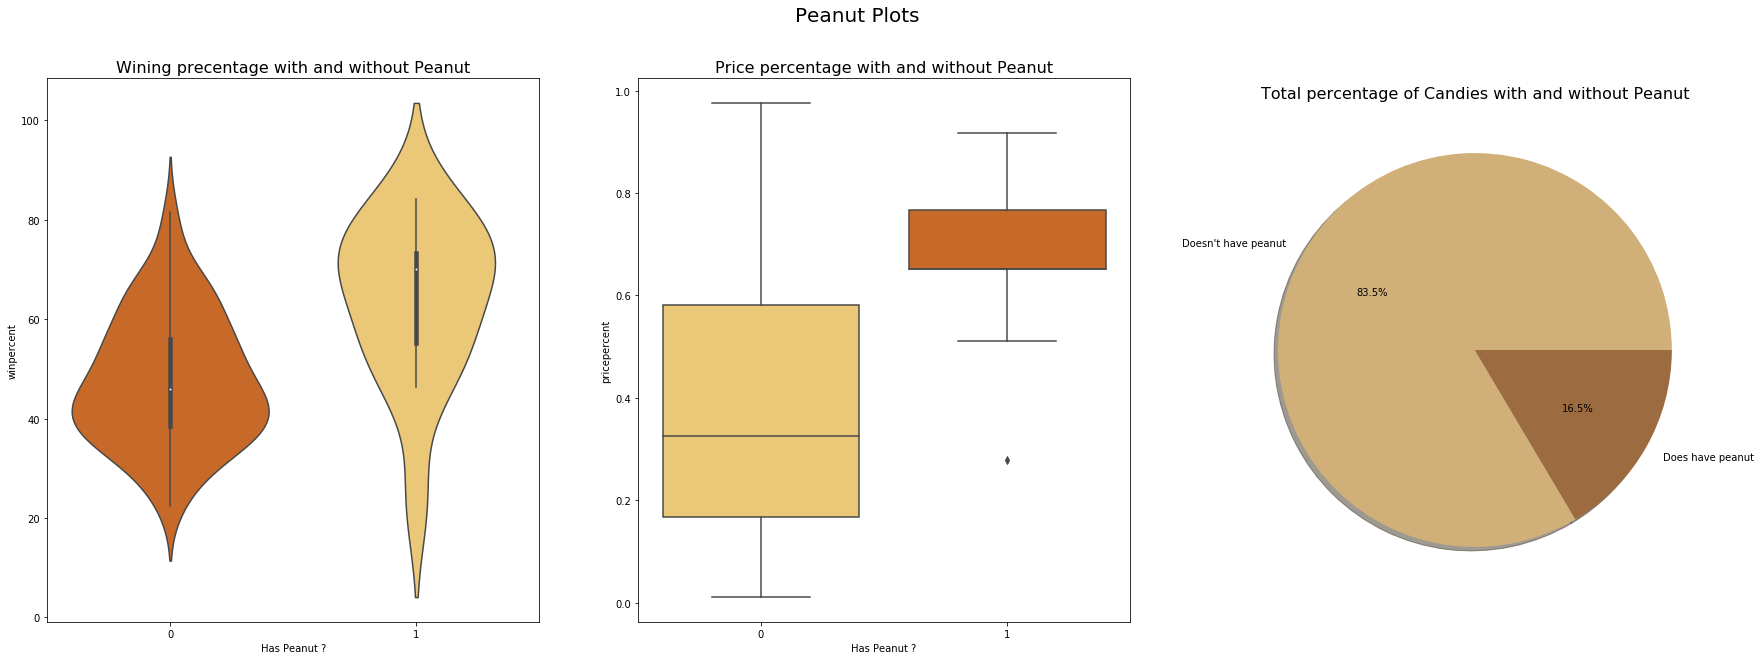

In [64]:
plt.figure(figsize=(30,10))

plt.suptitle("Peanut Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Peanut",fontsize=16)
sns.violinplot(data=data,x="peanutyalmondy",y="winpercent",palette="YlOrBr_r")
plt.xlabel("Has Peanut ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Peanut",fontsize=16)
plt.pie(data.peanutyalmondy.value_counts(), autopct='%1.1f%%',colors=["#D0B078","#9C6B40"],labels=["Doesn't have peanut","Does have peanut"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Peanut",fontsize=16)
sns.boxplot(y="pricepercent", x="peanutyalmondy", data=data, palette="YlOrBr")
plt.xlabel("Has Peanut ?")

plt.show()

# Plot Descriptions:

- ***Peanut is also key of Winning (like chocolate)***
- ***Also expensive (like chocolate)***
- ***Though it is not very common to use (i think because of the highes cost may be)***
- ***Also it's because of Peanuts or Almonds are not very popular on the market ***

# Nougat 

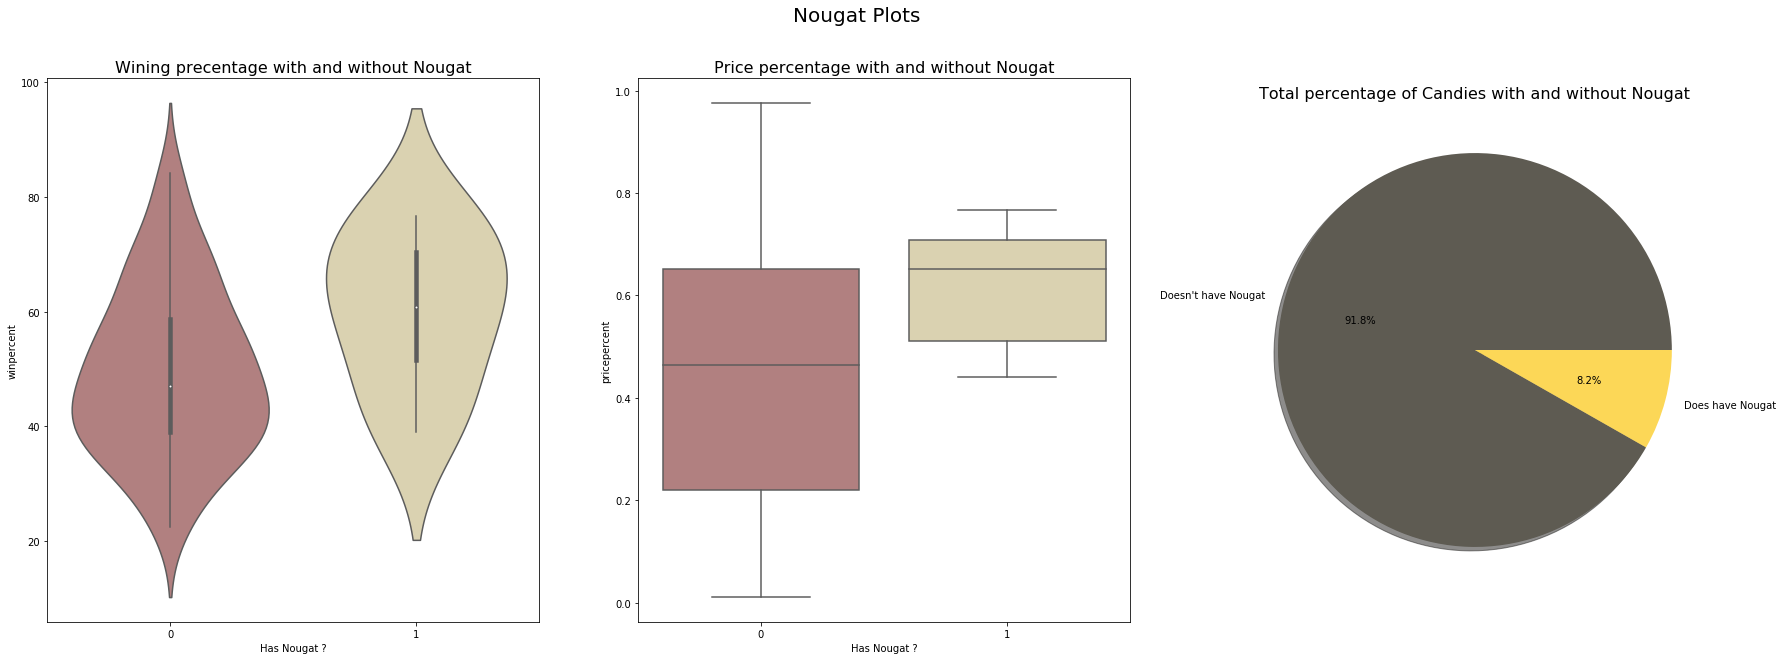

In [65]:
plt.figure(figsize=(30,10))

plt.suptitle("Nougat Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Nougat",fontsize=16)
sns.violinplot(data=data,x="nougat",y="winpercent",palette="pink")
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Nougat",fontsize=16)
plt.pie(data.nougat.value_counts(), autopct='%1.1f%%',colors=["#5e5b52","#fcd757"],labels=["Doesn't have Nougat","Does have Nougat"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Nougat",fontsize=16)
sns.boxplot(y="pricepercent", x="nougat", data=data, palette="pink")
plt.xlabel("Has Nougat ?")

plt.show()

# Plot Descriptions:

- ***It has small effect on winning. general scores are between 60 and 80.***
- ***Slightly more expensive than the others***
- ***Not popular in the Candy business too.***

# Crisped Rice or Wafer

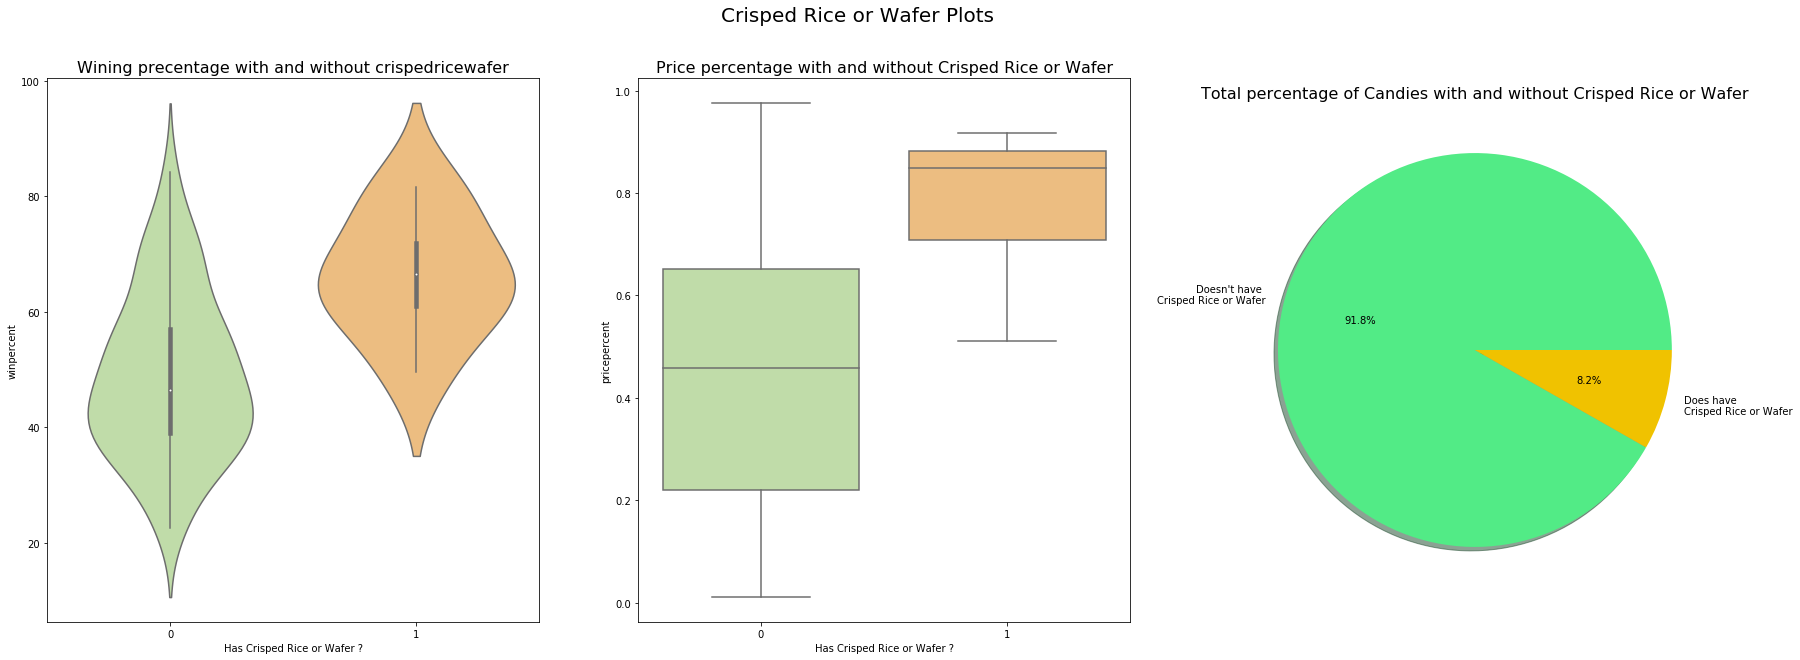

In [832]:
plt.figure(figsize=(30,10))

plt.suptitle("Crisped Rice or Wafer Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without crispedricewafer",fontsize=16)
sns.violinplot(data=data,x="crispedricewafer",y="winpercent",palette="Spectral_r")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Crisped Rice or Wafer",fontsize=16)
plt.pie(data.crispedricewafer.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Doesn't have \nCrisped Rice or Wafer","Does have \nCrisped Rice or Wafer"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Crisped Rice or Wafer",fontsize=16)
sns.boxplot(y="pricepercent", x="crispedricewafer", data=data, palette="Spectral_r")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.show()


# Plot Descriptions:

- It has considerably good effect on winning. Minimun score is around 40, which is a good sign
- More expensive than the others
- Not popular in the Candy business too.

## Bivariate Analysis:-

/home/hasan/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


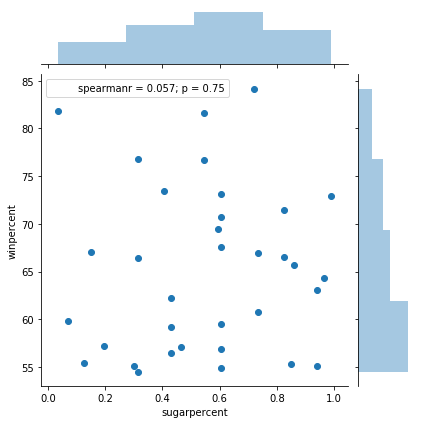

In [829]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="scatter",stat_func=spearmanr)

### Linearity of Sugar and Win Percent:-


The above plot proves the alternative hypothesis that sugar percentage is not linear to the popularity of the candy  i.e. **sugar content of candy doesn't contribute to the popularity of the candy.**

/home/hasan/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


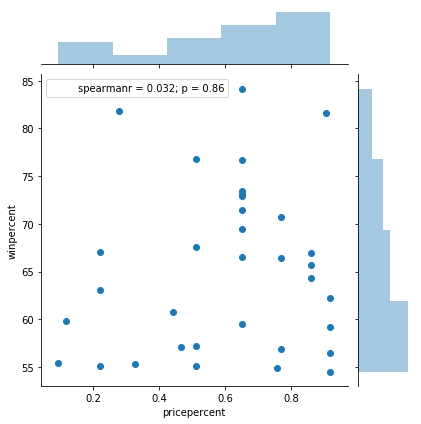

In [830]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="scatter",stat_func=spearmanr)

### Linearity of Price and Win Percent
The above plot proves the alternative hypothesis that price percentage is not linear to the popularity of the candy i.e. **cost of candy doesn't contribute to the popularity of the candy.**

# Lets the divide the dataset into test and train 

In [858]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:-1]],data[data.columns[-1]], test_size=0.33, random_state=42)
rmse_err = []

# Find the most important features

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.016813
7     0.060535
8     0.069828
9     0.200286
10    0.652538
Name: Importance, dtype: float64


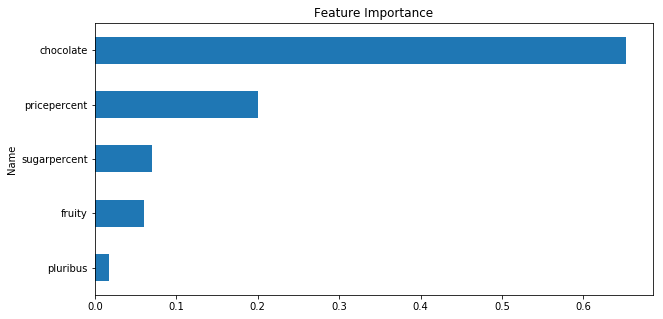

In [861]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
imp = pd.DataFrame.from_dict({'Name':data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
print(imp_plt["Importance"])
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

In [862]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# instantiate
feature_cols = data.columns[1:-1]

lm2 = LinearRegression()
# fit
lm2.fit(X_train, y_train)

# print coefficients
list(zip(feature_cols, lm2.coef_))

[('chocolate', 18.983958965915722),
 ('fruity', 9.406959392305037),
 ('caramel', 1.0723513494157546),
 ('peanutyalmondy', 9.71374738192126),
 ('nougat', -3.357671530959273),
 ('crispedricewafer', 1.364180557558922),
 ('hard', -6.787121916977013),
 ('bar', 5.130505767516388),
 ('pluribus', -4.397978272884794),
 ('sugarpercent', 11.371298039536173),
 ('pricepercent', -5.004239155426754)]

# Final Verdict

To Sum Up:

If a hypothetical candy had chocolate in it, we’d expect its win percentage to rise by about 18.98 points according to Decision Tree Regression analysis. If it’s peanuts, we’d expect it to rise by 9.7. If it had fruity, we’d also expect its win percentage to rise by 9.4 points , with crisped rice rising by 1.3. And nougat and caramel(only 1.07) don’t bring a ton to the table. Also candy being hard has add almost nothing while bar has good impact on rising win percentage as it usually combined with other ingredients.

Based on the Descriptive data analysis , it is quite clear that chocolate has highest impact as it has the highest co-effecients , almost doule from the second highest which is peanutyalmondy. 

Can we say something concrete from this analysis? i think NO. it will be over simplification though. 
Well, we saw that things with chocolate and extra ingredient(s) like Bar (except fruits) makes the best combination for winning. (e.g. Snickers(bar)). But they cost more.

So, Candies in bar form generally had a higher overall win rate than those in pieces, so we’ll want a bar. 

 - Chocolate nad Bar has the highest vaergae win percantage
 - Chocolate and peanut has seond highest average win percentage
 - Fruity is also used a lot but it has not impacted that much on win percentage
 

***In the end, We want Chocolate bar for our hallowen candy market. ***

# Do some analysis with Regressor model and Cluster based model

# As there are lot of regressor model to train and test the dataset, I have dicided to go with Random Forest algorithm as i have tried already different model and i got lowest error with Random Forest.

- First we will try with simple Random forest algorithm and see the result , if it doesnt make myself satisfied , i will do the cross validation with k fold. 

In [792]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)
result= math.sqrt(mean_squared_error(y_train,rf_reg.predict(X_train)))
test_result = math.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test)))

In [793]:
print(result)
print(test_result)
print(rf_reg.get_params())

4.412029523130975
11.191254168409282
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


*** We can see the error of train and test is not good. The test error is very lower from test error. This is not a good model , i think with cross fold validation it might give better result ***

- Usually most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features).


- All the parametrs are which can be hyper tuned 

  - n_estimators = number of trees in the foreset
  - max_features = max number of features considered for splitting a node
  - max_depth = max number of levels in each decision tree
  - min_samples_split = min number of data points placed in a node before the node is split
  - min_samples_leaf = min number of data points allowed in a leaf node
  - bootstrap = method for sampling data points (with or without replacement)

# Random search K Fold Cross-Validation with Random Forest

***On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.***

# Random Search Training
 - Now, we instantiate the random search and fit it like any Scikit-Learn model:

# Evaluate Random Search

In [838]:
from sklearn.metrics import accuracy_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mean_sqr = math.sqrt(mean_squared_error(y_test,model.predict(test_features)))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("Mean sqr err : ", mean_sqr )

    return accuracy



In [809]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 9.4399 degrees.
Accuracy = 78.94%.
Mean sqr err :  11.676499278092614
Model Performance
Average Error: 9.0136 degrees.
Accuracy = 79.93%.
Mean sqr err :  11.14658232464927
Improvement of 1.26%.


# Grid Search with Cross Validation

# Clustering the data


In [863]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [865]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   18.7s


Model Performance
Average Error: 10.0009 degrees.
Accuracy = 78.81%.
Mean sqr err :  11.546284712435341
Improvement of -0.16%.


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   25.9s finished
/home/hasan/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [823]:
test_data= [1,0,1,0,0,0,0,1,0,0.594,0.600]
    
np_test_data =np.asarray(test_data)
np_test_data = np_test_data.reshape(np.array([1,11]))
result_testing = best_grid.predict(np_test_data)

In [824]:
result_testing

array([63.17157853])

In [671]:
network_dimensions = np.array([10, 10])
n_iterations = 100000
init_learning_rate = 0.01

normalise_data = True

# if True, assume all data on common scale
# if False, normalise to [0 1] range along each column
normalise_by_column = False

In [672]:
choc_data = data.drop(["competitorname","winpercent"], axis=1)


In [673]:
choc_data.head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511
5,1,0,0,1,0,0,0,1,0,0.465,0.767
6,1,0,1,1,1,0,0,1,0,0.604,0.767
7,0,0,0,1,0,0,0,0,1,0.313,0.511
8,0,0,0,0,0,0,0,0,1,0.906,0.325
9,0,1,1,0,0,0,0,0,0,0.604,0.325


In [674]:
# establish variables based on data
m = choc_data.shape[0]
n =  choc_data.shape[1]
print(m)
# initial neighbourhood radius
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
# radius decay parameter
time_constant = n_iterations / np.log(init_radius)

data1 = choc_data
#print(data)
# check if data needs to be normalised
if normalise_data:
    if normalise_by_column:
        # normalise along each column
        col_maxes = choc_data.max(axis=0)
        data1 = choc_data / col_maxes[np.newaxis, :]
    else:
        # normalise entire dataset
        data1 = choc_data / data1.max()


85


In [675]:
data1 = data1.to_numpy()
print(data1)

[[1.         0.         1.         0.         0.         1.
  0.         1.         0.         0.74089069 0.88114754]
 [1.         0.         0.         0.         1.         0.
  0.         1.         0.         0.61133601 0.52356555]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.0111336  0.11885246]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.0111336  0.52356555]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.91700409 0.52356555]
 [1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.47064778 0.78586067]
 [1.         0.         1.         1.         1.         0.
  0.         1.         0.         0.61133601 0.78586067]
 [0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.31680162 0.52356555]
 [0.         0.         0.         0.         0.        

In [676]:
# setup random weights between 0 and 1
# weight matrix needs to be one m-dimensional vector for each neuron in the SOM
net = np.random.random((network_dimensions[0], network_dimensions[1], n))
print(net.shape)

(10, 10, 11)


In [677]:
def find_bmu(t, net, m):
    """
        Find the best matching unit for a given vector, t, in the SOM
        Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional BMU
                 and bmu_idx is the index of this vector in the SOM
    """
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max    
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # don't bother with actual Euclidean distance, to avoid expensive sqrt operation
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

In [678]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)
def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [680]:
for i in range(n_iterations):
    #print('Iteration %d' % i)
    
    # select a training example at random
    t = data1[np.random.randint(0, m), :].reshape(np.array([n,1]))
    #print("first t value:", t);
    
    # find its Best Matching Unit
    bmu, bmu_idx = find_bmu(t, net, n)
    #print("bmu_index: ",bmu_idx)
    
    # decay the SOM parameters
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    # now we know the BMU, update its weight vector to move closer to input
    # and move its neighbours in 2-D space closer
    # by a factor proportional to their 2-D distance from the BMU
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(n,1)
            
            #print("net",net)
            #print("wwww:",w)
            # get the 2-D distance (again, not the actual Euclidean distance)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            # if the distance is within the current neighbourhood radius
            if w_dist <= r**2:
                # calculate the degree of influence (based on the 2-D distance)
                influence = calculate_influence(w_dist, r)
                # now update the neuron's weight using the formula:
                # new w = old w + (learning rate * influence * delta)
                # where delta = input vector (t) - old w
                new_w = w + (l * influence * (t - w))
                # commit the new weight
                net[x, y, :] = new_w.reshape(1, 11)
                

In [681]:
def find_classification(t, net, m):
  
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max    
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(n, 1)
            # don't bother with actual Euclidean distance, to avoid expensive sqrt operation
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(n, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

In [682]:
group = np.zeros(85)
list1 = []
list2 =[]
for i in range(85):
    
    #print('Iteration %d' % i)
    # select a training example at random
    t = data1[i,:].reshape(np.array([11, 1]))
    #print(t)
    #t = data[:, i].reshape(np.array([m, 1]))
    #print("first t value:", t);
    #print(t)
    # find its Best Matching Unit
    bmu, bmu_idx = find_classification(t, net, n)
    #print("bmu_index: ",bmu_idx)
    group[i]=bmu_idx[0]
    list1.append(bmu_idx[0])
    list2.append(bmu_idx[1])

In [707]:

#np_test_data =np.asarray(test_data)
#np_test_data = np_test_data.reshape(np.array([12, 1]))
#print(np_test_data)
list11 = []
list22 =[]

test_data= [1,0,1,0,0,0,0,1,0,0.594,0.600]
    
np_test_data =np.asarray(test_data)
np_test_data = np_test_data.reshape(np.array([11, 1]))
col_maxes = np_test_data.max(axis=0)
data1 = np_test_data / col_maxes[np.newaxis, :]

    #print("bmu_index: ",bmu_idx1, bmu1)

bmu1, bmu_idx1 = find_classification(data1, net, n)
print(data1)
list11.append(bmu_idx1[0])
list22.append(bmu_idx1[1])
print("bmu_index: ",bmu_idx1, bmu1)

[[1.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.594]
 [0.6  ]]
bmu_index:  [2 6] [[9.94242520e-01]
 [9.51080549e-23]
 [9.76357453e-01]
 [3.48155248e-03]
 [1.17717606e-03]
 [9.30986516e-03]
 [3.01252213e-13]
 [9.23447365e-01]
 [7.65526346e-02]
 [9.55220110e-01]
 [8.76984890e-01]]


In [689]:
data.competitorname = pd.Categorical(data.competitorname)

In [690]:
data["Catagory"] = data.competitorname.cat.codes

In [691]:
catagory = data["Catagory"].to_list()

In [692]:
compt_name=compt_name.to_list()

AttributeError: 'list' object has no attribute 'to_list'

In [607]:
# ---GRAPHICAL VISUALIZATIONS ---
def visualization():
    print("Graph for 5*5 size SOM")
    f = plt.figure(figsize=(15,10))
    ax = f.subplots()
    ax.scatter(list1, list2)
    for i, txt in enumerate(%cat):
        ax.annotate(txt, (list1[i], list2[i]), size=20)
        

SyntaxError: invalid syntax (<ipython-input-607-7062b95b0603>, line 7)

In [608]:
plt.show()

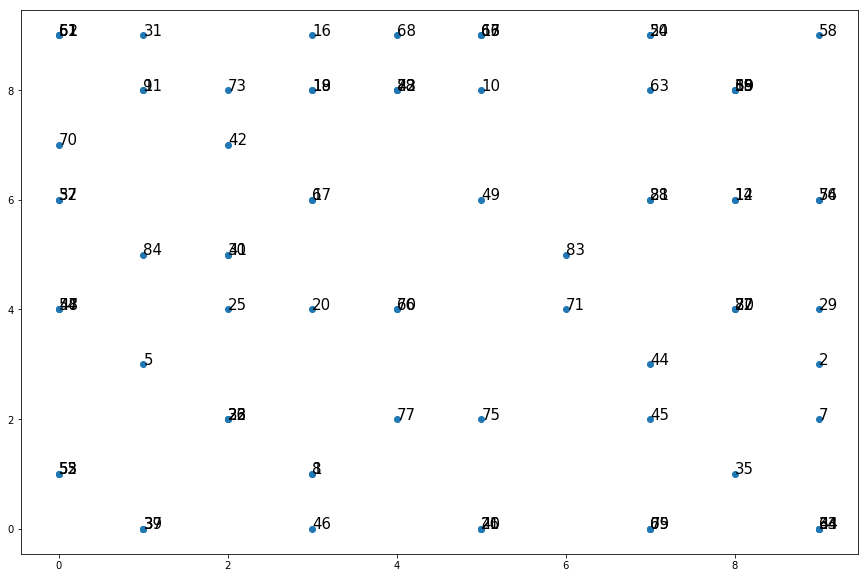

In [597]:
f = plt.figure(figsize=(15,10))
ax = f.subplots()
ax.scatter(list1, list2)
    
for i, txt in enumerate(catagory):
    ax.annotate(txt, (list1[i], list2[i]), fontsize=15)
    
    list1[i]+=0.10
    list2[i]+=0.10

In [708]:
from cmath import sqrt
data_point = [2,6]
dist ={}

for i in range(m):
    distance = math.sqrt((data_point[0]-list1[i])**2+(data_point[1]-list2[i])**2)
    #print(distance)
    indx = i
    dist[i]= distance
    
    



In [709]:
import operator
sorted_dict = sorted(dist.items(), key=operator.itemgetter(1))
print(sorted_dict)

[(38, 0.0), (0, 1.4142135623730951), (35, 1.4142135623730951), (36, 1.4142135623730951), (37, 1.4142135623730951), (56, 1.4142135623730951), (79, 1.4142135623730951), (24, 2.0), (25, 2.0), (39, 2.0), (70, 2.0), (84, 2.0), (65, 2.23606797749979), (77, 2.23606797749979), (1, 2.8284271247461903), (10, 2.8284271247461903), (33, 3.0), (62, 3.0), (27, 3.1622776601683795), (71, 3.1622776601683795), (75, 3.1622776601683795), (22, 3.605551275463989), (23, 3.605551275463989), (28, 3.605551275463989), (43, 3.605551275463989), (51, 3.605551275463989), (83, 3.605551275463989), (9, 4.123105625617661), (48, 4.123105625617661), (54, 4.123105625617661), (59, 4.242640687119285), (76, 4.242640687119285), (5, 4.47213595499958), (8, 4.47213595499958), (19, 4.47213595499958), (40, 4.47213595499958), (42, 4.47213595499958), (52, 4.47213595499958), (2, 5.0), (3, 5.0), (4, 5.0), (46, 5.0990195135927845), (34, 5.830951894845301), (60, 5.830951894845301), (61, 5.830951894845301), (31, 6.082762530298219), (32, 6.

In [710]:
win_precent_list = []


In [711]:
j=0
for i in range(3):
    dis = sorted_dict[i][1]
    if(dis<=1.0):
        
        j = sorted_dict[i][0]

        print(j)
        for k in range(85):

            if(data["Catagory"][k])==j:
                val = data.iloc[j]['competitorname']
                val1= data.iloc[j]['winpercent']
                print(val, val1)
                win_precent_list.append(val1)

38
Milky Way Simply Caramel 64.35334


In [831]:
sum(win_precent_list)/len(win_precent_list)

64.35334